# Importing Files and Library

In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("kc_house_data.csv")
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

# EDA

In [3]:
df.shape

(21613, 21)

There are 21613 rows and 21 column

In [4]:
df.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

There are 1 independent feature are categorical and rest are numeric

In [5]:
df.isna().sum() # there is no null value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
corr = df.corr(numeric_only=True)

<Axes: >

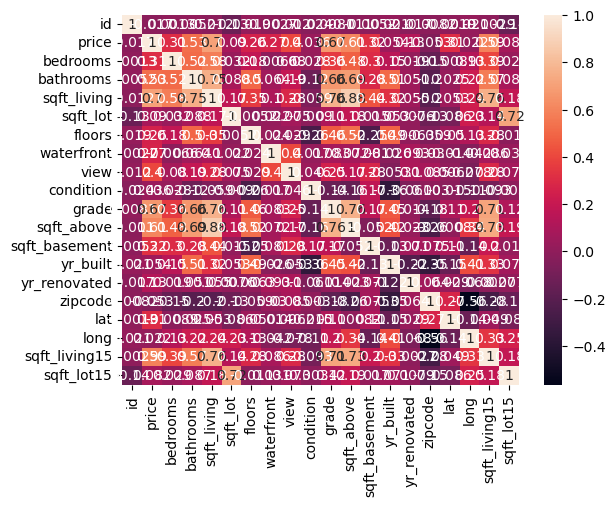

In [7]:
sea.heatmap(corr,annot=True) 

There is no high co-relation bevtween feature

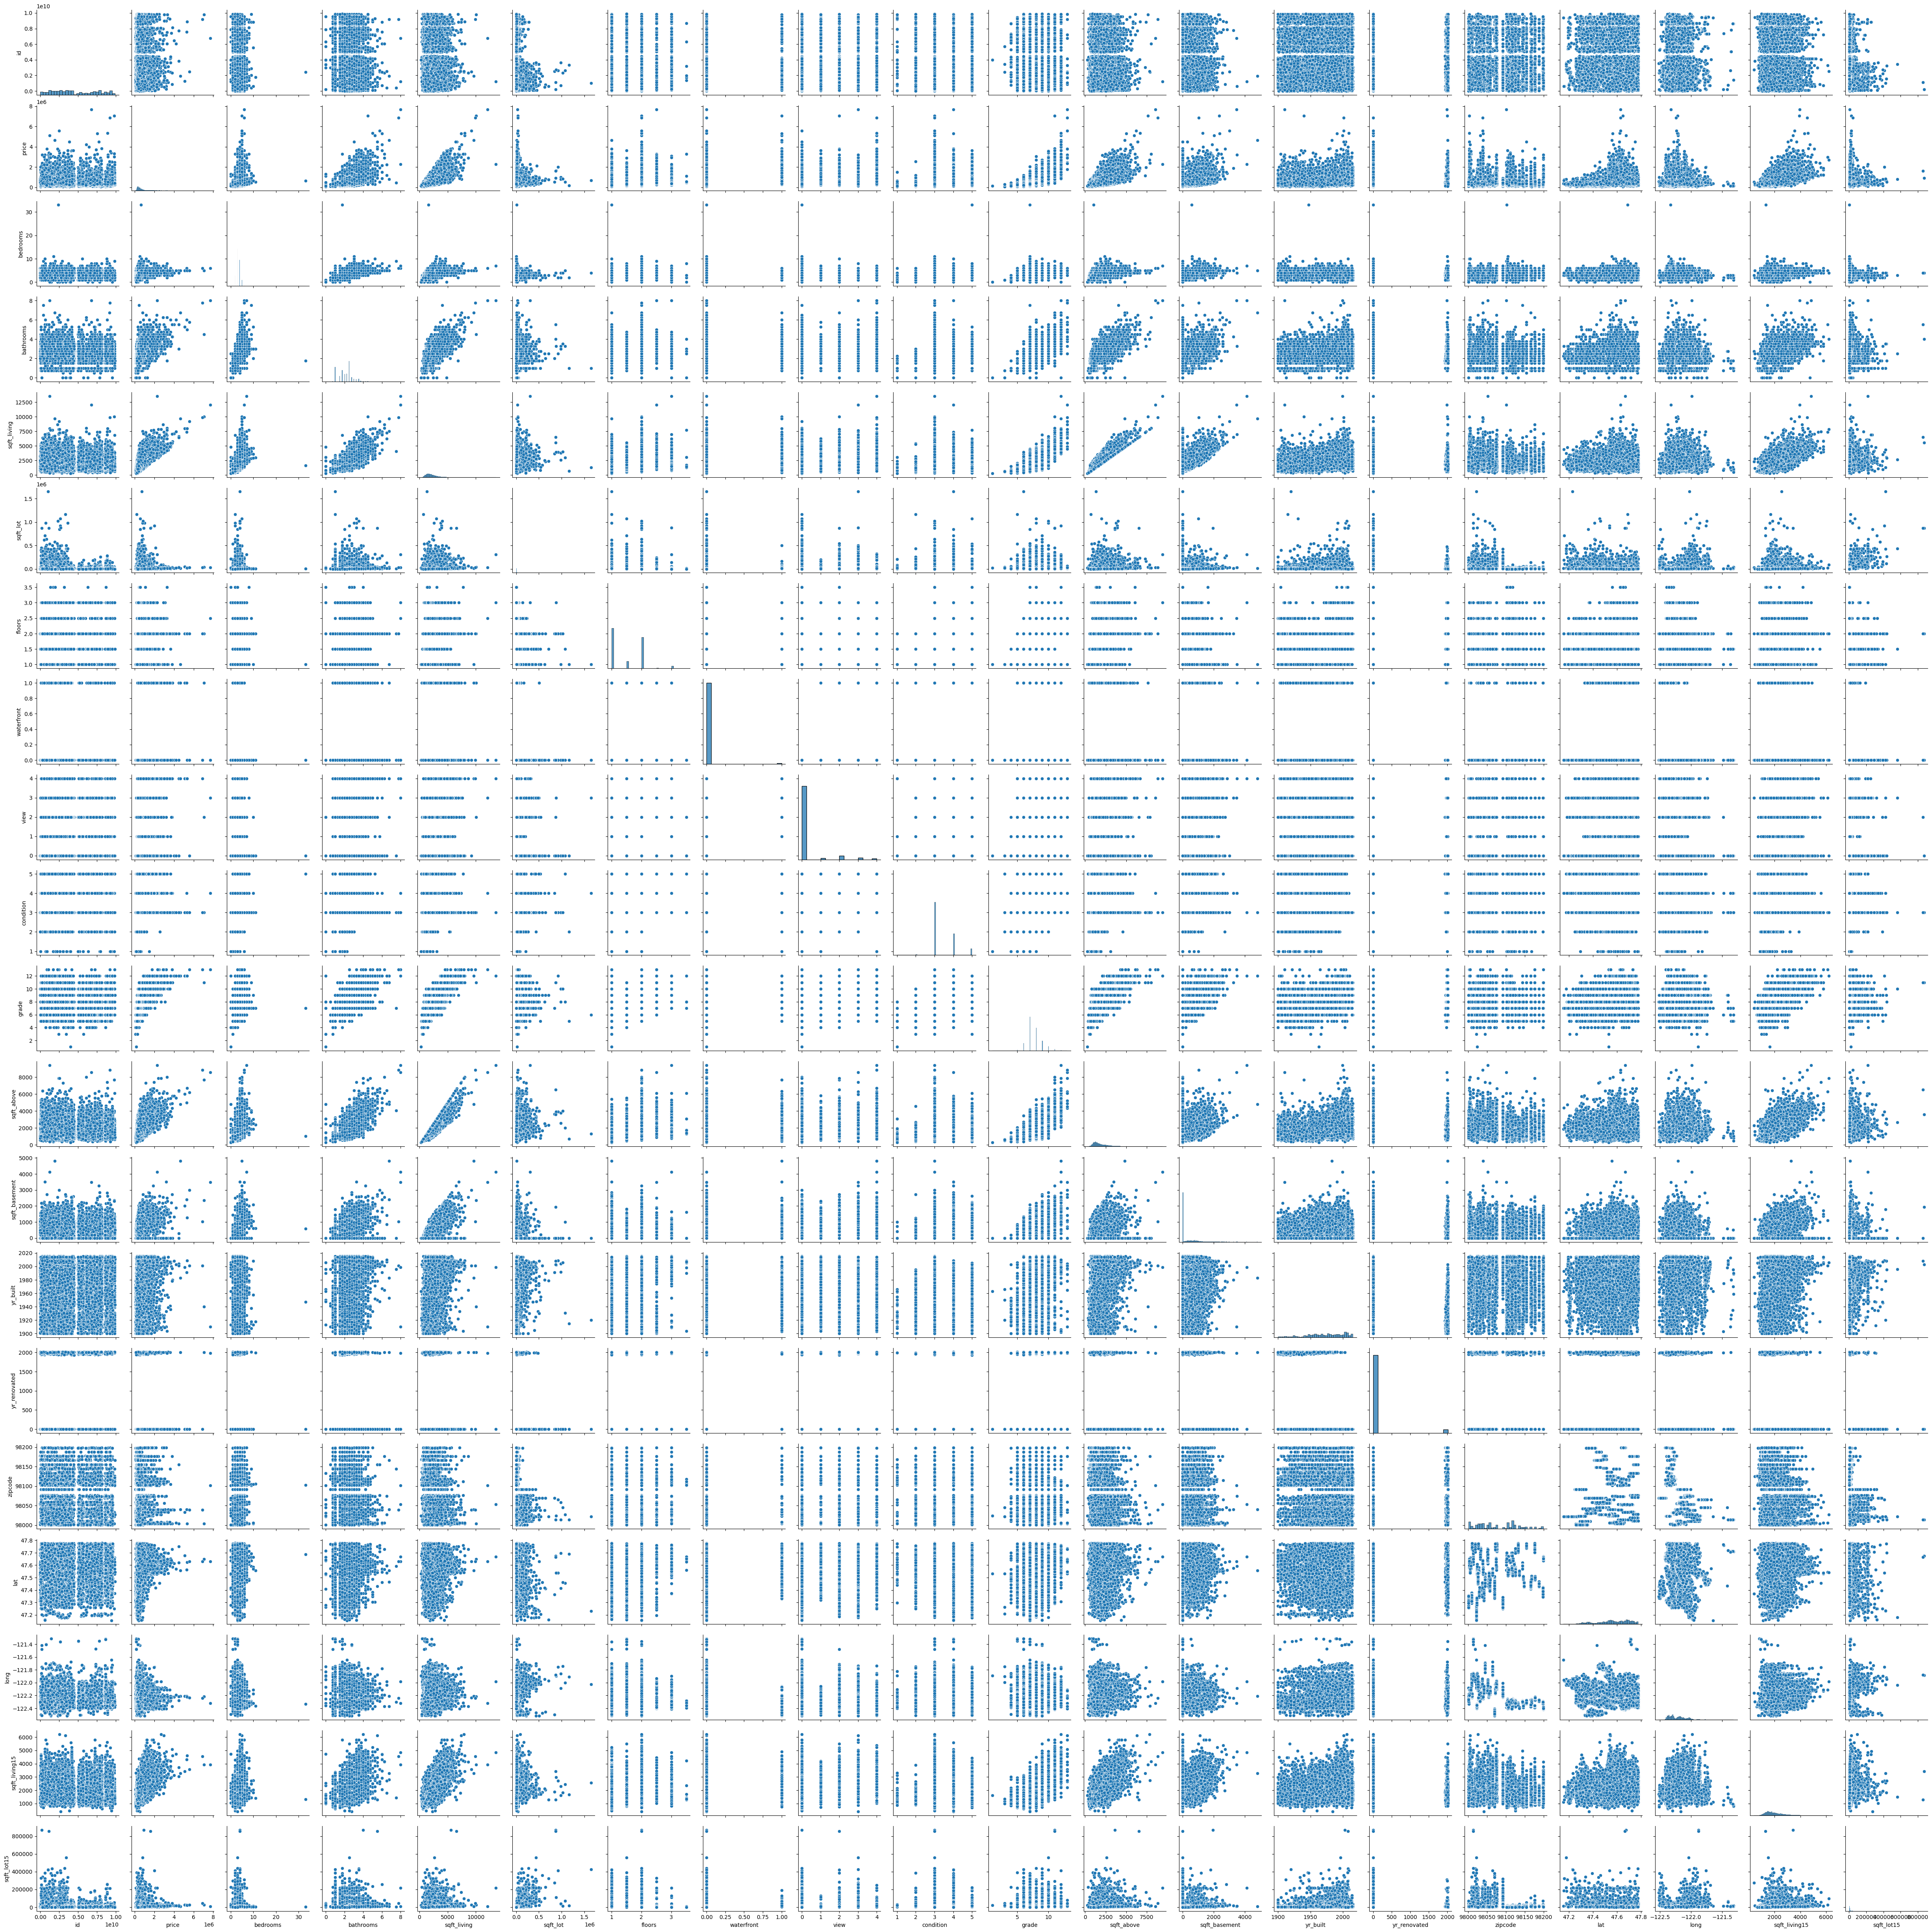

In [8]:
sea.pairplot(df)

<Axes: xlabel='count', ylabel='date'>

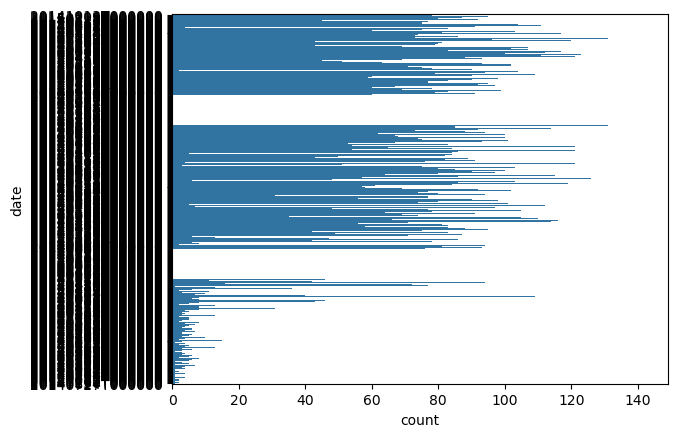

In [9]:
sea.countplot(df['date'])

<Axes: ylabel='id'>

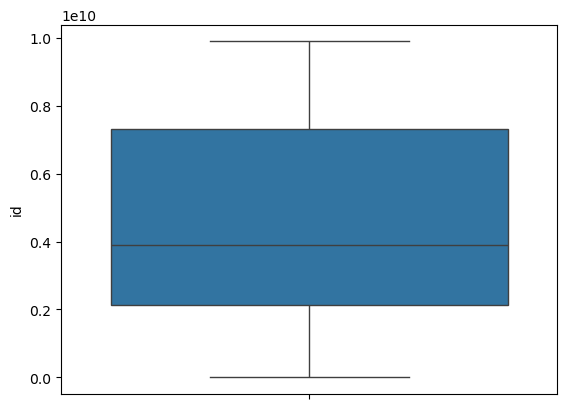

In [10]:
sea.boxplot(df["id"])

  id feature is in normal ramge

<Axes: ylabel='bedrooms'>

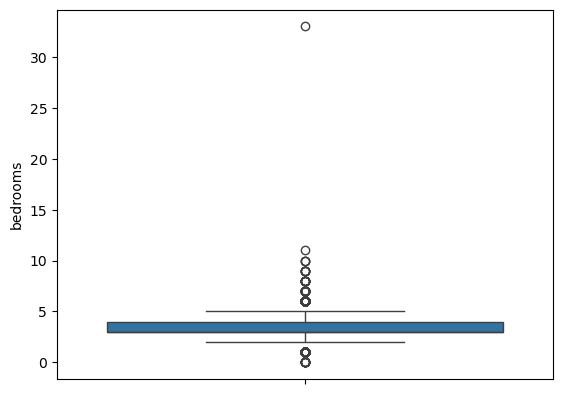

In [11]:
sea.boxplot(df["bedrooms"])

In [12]:
df[df["bedrooms"]>5] 

id             date      price  bedrooms  bathrooms  \
209    6300000550  20140717T000000   464000.0         6       3.00   
232    9264902050  20141121T000000   315000.0         6       2.75   
239    5152100060  20140529T000000   472000.0         6       2.50   
331    2946001550  20150416T000000   279000.0         6       1.75   
486    9286000240  20140711T000000  1067000.0         6       3.50   
...           ...              ...        ...       ...        ...   
20984  2149800278  20141015T000000   343000.0         6       5.00   
21085  4449800480  20150318T000000   677790.0         6       3.00   
21186  7896300592  20150114T000000   303500.0         6       4.50   
21375  6061500100  20140717T000000  1174660.0         6       3.50   
21522   603000555  20150302T000000   462500.0         6       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
209           2300      3404     2.0           0     0  ...      7   
232           2940      7350     1.0           0     0  ...      8   
239           4410     14034     1.0           0     2  ...      9   
331           2240     11180     2.0           0     0  ...      7   
486           4860     11793     2.0           0     0  ...     11   
...            ...       ...     ...         ...   ...  ...    ...   
20984         2732      7655     2.0           0     0  ...      7   
21085         2800      4213     2.0           0     0  ...      8   
21186         3390      7200     2.0           0     0  ...      8   
21375         4310      7760     2.0           0     0  ...     10   
21522         2390      4000     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
209          1600            700      1920          1994    98133  47.7067   
232          1780           1160      1978             0    98023  47.3103   
239          2350           2060      1965             0    98003  47.3376   
331          2240              0      1955             0    98198  47.4200   
486          3860           1000      1998             0    98006  47.5521   
...           ...            ...       ...           ...      ...      ...   
20984        2732              0      2009             0    98002  47.3045   
21085        2800              0      1998             0    98117  47.6892   
21186        2440            950      2007             0    98118  47.5205   
21375        3260           1050      2013             0    98059  47.5297   
21522        2390              0      2014             0    98118  47.5173   

          long  sqft_living15  sqft_lot15  
209   -122.343           1560        1312  
232   -122.339           2120        8236  
239   -122.324           2600       13988  
331   -122.323           1590        7955  
486   -122.137           3600       11793  
...        ...            ...         ...  
20984 -122.211           3078       69993  
21085 -122.389           1440        3960  
21186 -122.288           2040        7214  
21375 -122.155           4620       10217  
21522 -122.286           1680        5000  

[334 rows x 21 columns]

There are 334 houses having more than 5 bedrooms

<Axes: ylabel='sqft_living'>

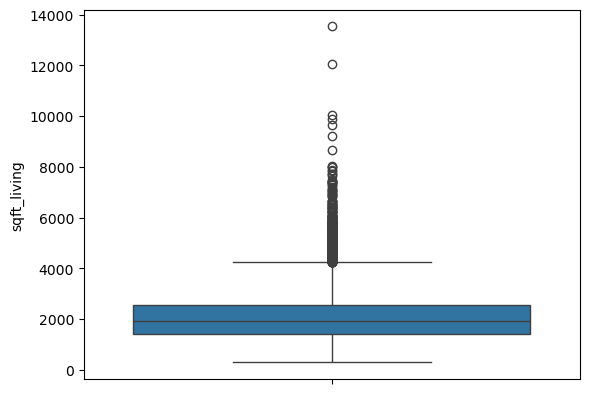

In [13]:
sea.boxplot(df["sqft_living"]) 

sqft_living has most outlier but non seems to be wrong value.

<Axes: ylabel='sqft_lot'>

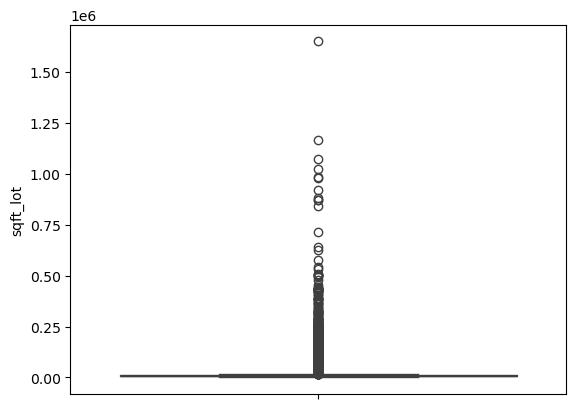

In [14]:
sea.boxplot(df["sqft_lot"]) 

sqft_lot has most outlier but non seems to be wrong value.

<Axes: ylabel='floors'>

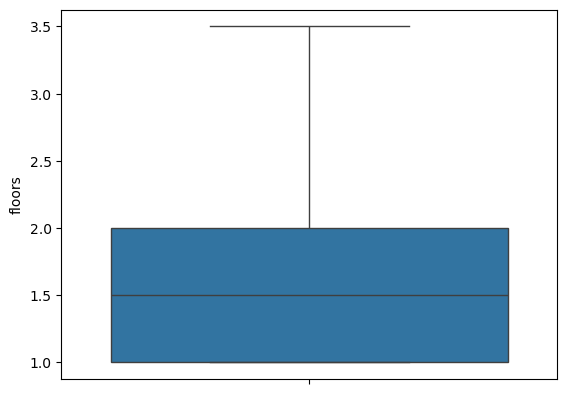

In [15]:
sea.boxplot(df["floors"])

floors feature is in normal ramge

<Axes: ylabel='waterfront'>

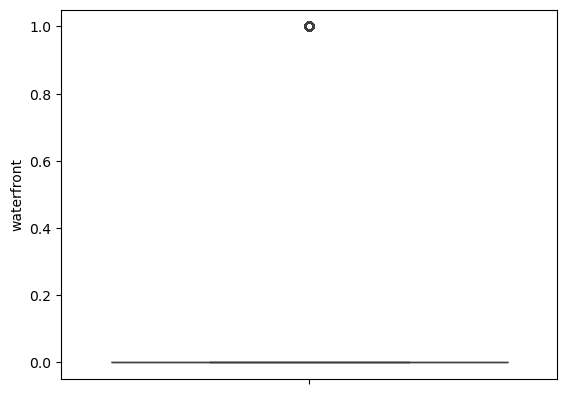

In [16]:
sea.boxplot(df["waterfront"])

waterfront have less outlier

<Axes: ylabel='view'>

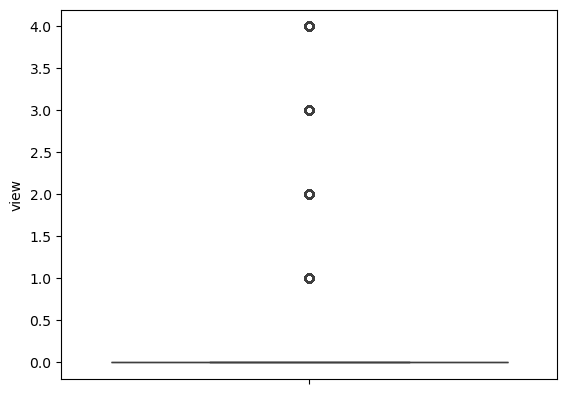

In [17]:
sea.boxplot(df["view"])

<Axes: ylabel='condition'>

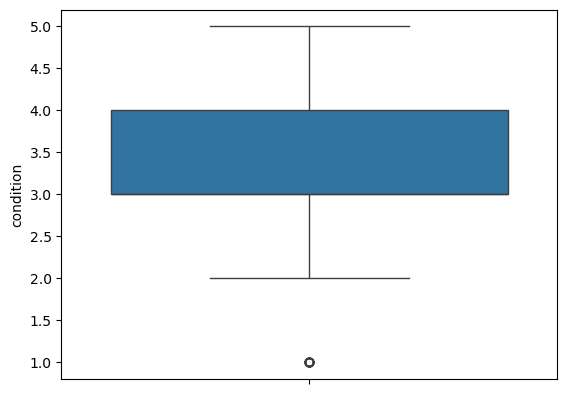

In [18]:
sea.boxplot(df["condition"])

condition have less outlier

<Axes: ylabel='grade'>

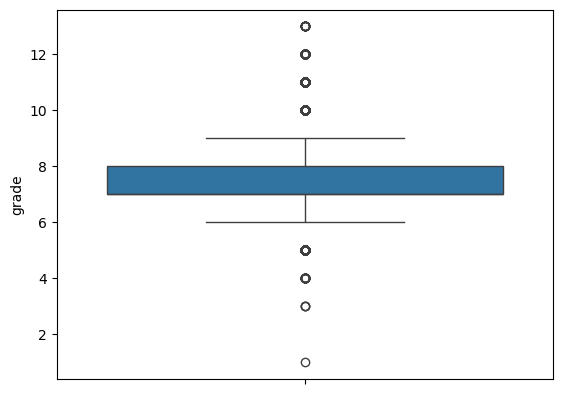

In [19]:
sea.boxplot(df["grade"])

<Axes: ylabel='sqft_above'>

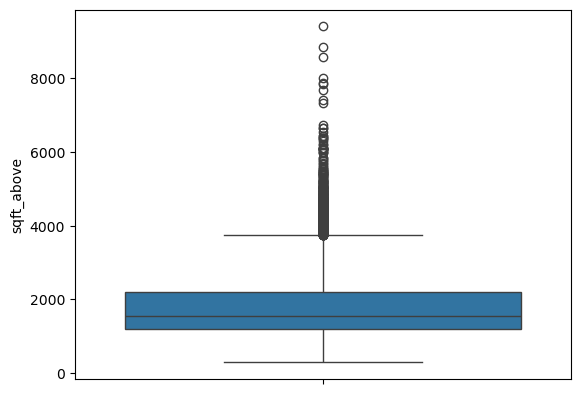

In [20]:
sea.boxplot(df["sqft_above"]) 

In [21]:
df[df["sqft_above"] > 4000]

id             date      price  bedrooms  bathrooms  \
269    7960900060  20150504T000000  2900000.0         4       3.25   
270    4054500390  20141007T000000  1365000.0         4       4.75   
419    8678500060  20140710T000000  1550000.0         5       4.25   
431    2944010240  20140908T000000   988000.0         4       3.00   
484    2625069070  20150410T000000  1385000.0         4       3.25   
...           ...              ...        ...       ...        ...   
21532   324069112  20140617T000000  1325000.0         4       4.00   
21551  1561750040  20141224T000000  1375000.0         5       4.50   
21561  6664500090  20150115T000000   750000.0         5       4.00   
21593  8672200110  20150317T000000  1088000.0         5       3.75   
21600   249000205  20141015T000000  1537000.0         5       3.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
269           5050     20100     1.5           0     2  ...     11   
270           5310     57346     2.0           0     0  ...     11   
419           6070    171626     2.0           0     0  ...     12   
431           4040     19700     2.0           0     0  ...     11   
484           4860    181319     2.5           0     0  ...      9   
...            ...       ...     ...         ...   ...  ...    ...   
21532         4420     16526     2.0           0     0  ...     11   
21551         4350     13405     2.0           0     0  ...     11   
21561         4500      8130     2.0           0     0  ...     10   
21593         4170      8142     2.0           0     2  ...     10   
21600         4470      8088     2.0           0     0  ...     11   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
269          4750            300      1982          2008    98004  47.6312   
270          5310              0      1989             0    98077  47.7285   
419          6070              0      1999             0    98024  47.5954   
431          4040              0      1987             0    98052  47.7205   
484          4860              0      1993             0    98074  47.6179   
...           ...            ...       ...           ...      ...      ...   
21532        4420              0      2013             0    98075  47.5914   
21551        4350              0      2014             0    98074  47.6018   
21561        4500              0      2007             0    98059  47.4832   
21593        4170              0      2006             0    98056  47.5354   
21600        4470              0      2008             0    98004  47.6321   

          long  sqft_living15  sqft_lot15  
269   -122.223           3890       20060  
270   -122.042           4180       47443  
419   -121.950           4680      211267  
431   -122.127           3930       21887  
484   -122.005           3850      181319  
...        ...            ...         ...  
21532 -122.027           3510       50447  
21551 -122.060           3990        7208  
21561 -122.145           2840        8402  
21593 -122.181           3030        7980  
21600 -122.200           2780        8964  

[412 rows x 21 columns]

there are 412 houses have more than 4000 sqft above

<Axes: ylabel='sqft_basement'>

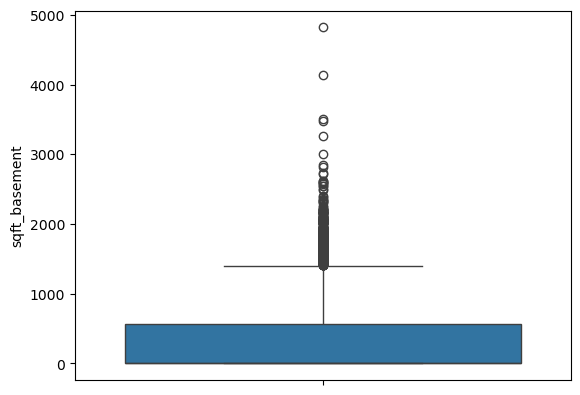

In [22]:
sea.boxplot(df["sqft_basement"]) 

sqft_basement have more than 1500 outlier

<Axes: ylabel='yr_built'>

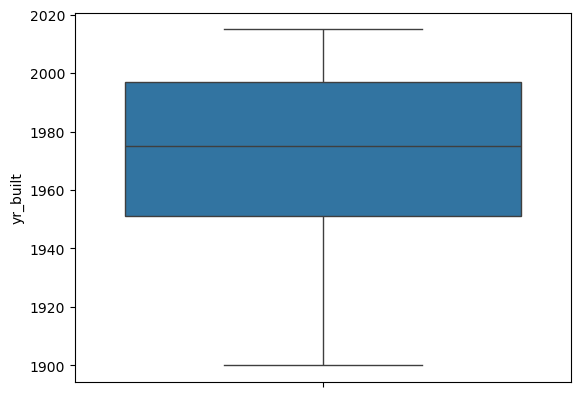

In [23]:
sea.boxplot(df["yr_built"])

yr_build feature is in normal ramge

<Axes: ylabel='yr_renovated'>

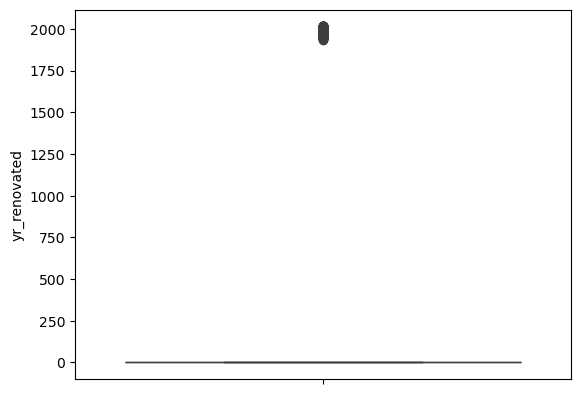

In [24]:
sea.boxplot(df["yr_renovated"])

<Axes: ylabel='zipcode'>

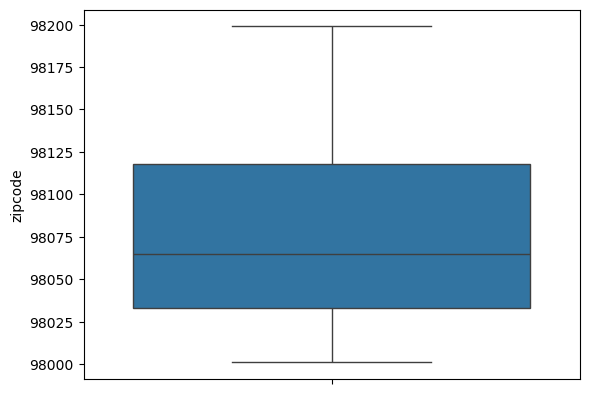

In [25]:
sea.boxplot(df["zipcode"])

zipcode feature is in normal ramge

<Axes: ylabel='lat'>

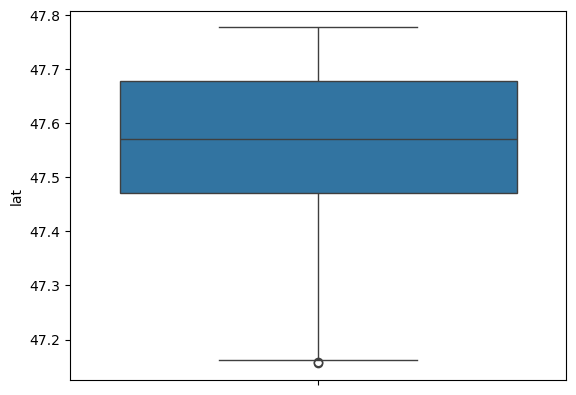

In [26]:
sea.boxplot(df["lat"])

lat as less outliers and seems to be not an important features. so we will drop it.

<Axes: ylabel='long'>

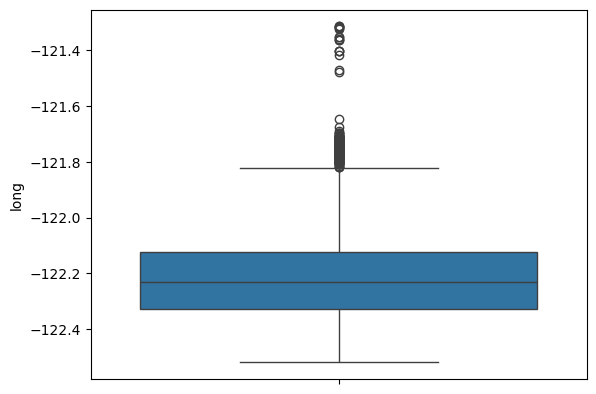

In [27]:
sea.boxplot(df["long"])

long as lot of outliers and seems to be not an important features. so we will drop it.

In [28]:
df = df.drop(["id","date","view","lat","long","sqft_living15","sqft_lot15"],axis=1)

As sqft_living and sqft_lot is already present it is better to delete similer feature given as sqft_living15,sqft_lot15

In [29]:
df["Age"] = 2015-df["yr_built"] 

as data was collected in year 2015, we are finding its age with respect to year 2015

In [30]:
df["renovated?"] = [0 if x== 0 else 1 for x in df["yr_renovated"]]

In [31]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  Age  renovated?  
0    98178   60           0  
1    98125   64           1  
2    98028   82           0  
3    98136   50           0  
4    98074   28           0

In [32]:

df = df.drop(["yr_renovated","yr_built"],axis=1)#deleting feature yr_renovated and yr_build because we added Feature Age and renovated


In [33]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   condition  grade  sqft_above  sqft_basement  zipcode  Age  renovated?  
0          3      7        1180              0    98178   60           0  
1          3      7        2170            400    98125   64           1  
2          3      6         770              0    98028   82           0  
3          5      7        1050            910    98136   50           0  
4          3      8        1680              0    98074   28           0

# pre processing

All feature are Numeric So, NO need of Label Encoding and Mapping

In [34]:
x = df.iloc[:,1:]

In [35]:
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0             3       1.00         1180      5650     1.0           0   
1             3       2.25         2570      7242     2.0           0   
2             2       1.00          770     10000     1.0           0   
3             4       3.00         1960      5000     1.0           0   
4             3       2.00         1680      8080     1.0           0   
...         ...        ...          ...       ...     ...         ...   
21608         3       2.50         1530      1131     3.0           0   
21609         4       2.50         2310      5813     2.0           0   
21610         2       0.75         1020      1350     2.0           0   
21611         3       2.50         1600      2388     2.0           0   
21612         2       0.75         1020      1076     2.0           0   

       condition  grade  sqft_above  sqft_basement  zipcode  Age  renovated?  
0              3      7        1180              0    98178   60           0  
1              3      7        2170            400    98125   64           1  
2              3      6         770              0    98028   82           0  
3              5      7        1050            910    98136   50           0  
4              3      8        1680              0    98074   28           0  
...          ...    ...         ...            ...      ...  ...         ...  
21608          3      8        1530              0    98103    6           0  
21609          3      8        2310              0    98146    1           0  
21610          3      7        1020              0    98144    6           0  
21611          3      8        1600              0    98027   11           0  
21612          3      7        1020              0    98144    7           0  

[21613 rows x 13 columns]

In [36]:
y = df.iloc[:,0]

In [37]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=123)
#we cannot use (stratisfy= y) because it is a regression value.

# MODEL SELECTION

1) As data is big and our dependend variable is numerice we will implement Linear Regression
2) As data is big we will implement XGBoost
3) Random Forest

# Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

y_pred = lr.predict(xtest)

In [40]:
mean_squared_error(ytest,y_pred)

47045436364.17642

In [41]:
r2_score(ytest,y_pred)

0.6535672295714037

R2 score of Linear Regression is 65.35%

# SVM -------> Using Regression

In [42]:
# svr = SVR()

In [43]:
# params = {"kernel" : ["linear","poly","rbf"]}

In [44]:
# gsc = GridSearchCV(estimator=svr,param_grid=params,scoring="r2")

In [45]:
# gsc.fit(xtrain,ytrain)

In [46]:
# y_pred = gsc.predict(xtest)

In [47]:
# gsc.best_params_


In [48]:
# gsc.best_score_

SVM taking very much time because dataset is big

# XGBOOST -----------> Using Regression

In [49]:
xgb = XGBRegressor()

To get best parameter we will use Hyper parameter Tuning

In [50]:
param={'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
       'max_depth':[3,4,5,6,8,10,12,15],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.3,0.4],
       'n_estimators':[40,50,100]
}

In [51]:
rsc = RandomizedSearchCV(estimator=xgb,
                        param_distributions=param,
                        scoring="r2",
                        n_iter=8)

In [52]:
rsc.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=8,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [40, 50, 100]},
                   scoring='r2')

In [53]:
rsc.best_params_

{'n_estimators': 50,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0.4}

In [54]:
rsc.best_score_

0.820835073469851

In [55]:
y_pred = rsc.predict(xtest)

In [56]:
print(r2_score(ytest,y_pred))

0.8434012026924846


R2 score of XGBOOST is 85.07%

# Random Forest ---------> Using Regression

In [57]:
rfr = RandomForestRegressor(n_estimators=10)

To get best parameter we will use Hyper parameter Tuning

In [58]:
param = {"n_estimators" : [10,20,30,40,50], "bootstrap" : [True, False]}

In [59]:
gsc = GridSearchCV(estimator=rfr,
                  param_grid=param,
                  scoring="r2")

In [60]:
gsc.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [61]:
gsc.best_params_

{'bootstrap': True, 'n_estimators': 20}

In [62]:
gsc.best_score_

0.7847802040936342

In [63]:
y_pred = gsc.predict(xtest)

In [64]:
print(r2_score(ytest,y_pred))

0.8047283329395108


R2 score of Random Forest is 81.97%

# Conclusion

I have used Three Algorithms are Linear Regression, XGBoost and Random Forest. Out of which XGBoost Algorithm is giving us the best result with R2 Score 85.07%